# 数据操作与数据预处理

In [2]:
#导入第三方库
import torch

In [3]:
torch.cuda.is_available()

True

- N维数组是机器学习和神经网络的主要数据结构

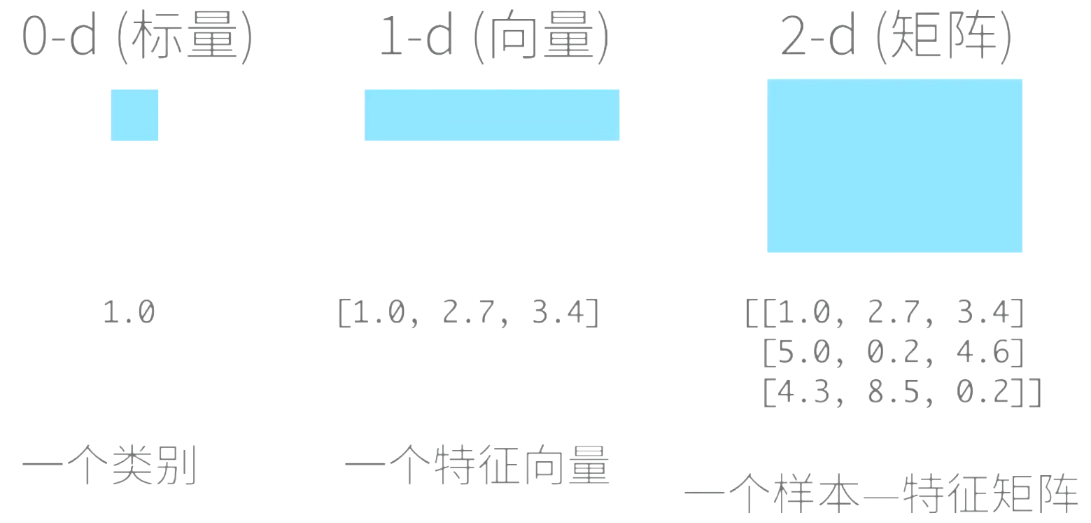

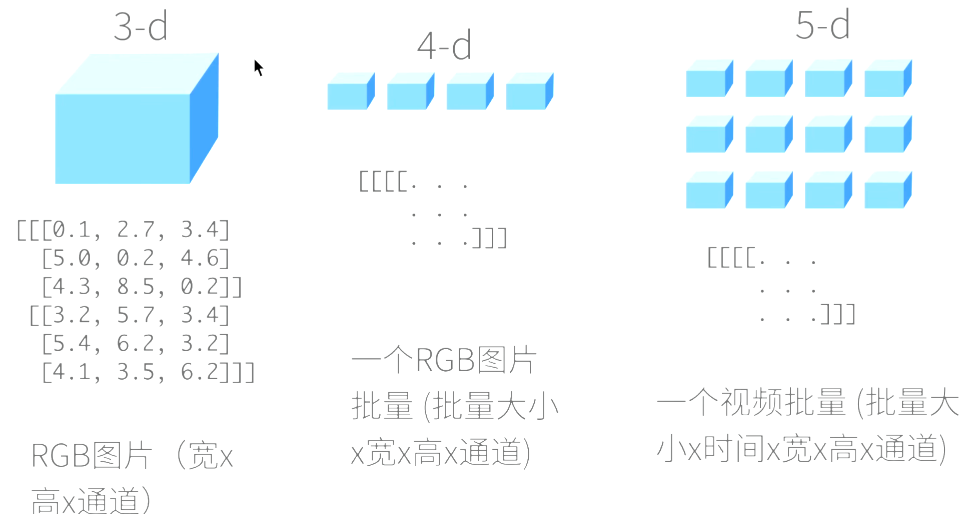

创建数组
- 创建数组需要
  - 形状：例如3*4矩阵
  - 每个元素的数据类型：例如32位浮点数
  - 每个元素的值，例如全为0，或者随机生成
  
访问元素
- 通过索引访问
  - 一个元素：[1，2]
  - 一行：[1,:]
  - 一列：[:,1]
  - 子区域：[1:3，1:]
  - 带跳转的子区域：[::3. ::2] 此处为跳转3行，跳转2列取元素

In [4]:
#创建一个0-11的张量
x = torch.arange(12)
x.shape
#通过reshape()方法改变张量的形状
x = x.reshape(3,4)
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [5]:
#使用全0、1或其它常量或者从特定分布中随机采样的数字
print(torch.zeros((2,3,4)))
print(torch.ones((3,3,4)))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


In [6]:
#通过包含数值的python列表(或嵌套列表)来为张量中的每个元素赋值
input = torch.tensor([[1, 2, 3, 4],
                      [4, 3, 2, 1],
                      [2, 3, 5, 2]])
print(input)

tensor([[1, 2, 3, 4],
        [4, 3, 2, 1],
        [2, 3, 5, 2]])


In [7]:
#常见的标准算术运算符(+ - * / **)都可以被升级为按元素运算
x = torch.tensor((1.0, 2, 3, 4))
y = torch.tensor((2, 2, 3, 3))

x*y, x-y, x/y, x**y

(tensor([ 2.,  4.,  9., 12.]),
 tensor([-1.,  0.,  0.,  1.]),
 tensor([0.5000, 1.0000, 1.0000, 1.3333]),
 tensor([ 1.,  4., 27., 64.]))

In [8]:
#按元素进行更多运算
torch.exp(x)

tensor([ 2.7183,  7.3891, 20.0855, 54.5981])

In [9]:
#把多个张量连接在一起
x = torch.arange(12, dtype= torch.float32).reshape(3, 4)
y = torch.tensor([[2.0, 1, 4, 3],
                  [2.0, 1, 2, 3],
                  [3.0, 1, 3, 2]])
#按行列进行张量拼接
torch.cat((x, y), dim= 0), torch.cat((x, y), dim= 1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 2.,  1.,  2.,  3.],
         [ 3.,  1.,  3.,  2.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  2.,  1.,  2.,  3.],
         [ 8.,  9., 10., 11.,  3.,  1.,  3.,  2.]]))

In [10]:
#通过逻辑运算符构建张量
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [11]:
#对张量中的所有元素求和
x.sum()

tensor(66.)

In [12]:
#即使形状不同，我们仍然可以调用广播机制(broadcasting mechanism)来执行元素操作
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a + b
print(a)
print(b)

tensor([[0],
        [1],
        [2]])
tensor([[0, 1]])


In [13]:
#通过索引访问元素值
x[-1], x[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [14]:
#为多个元素赋值，只需索引所有元素，然后直接赋值
x[0:2, : ] = 12
x 

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [15]:
#运行一些操作可能会导致为新结果分配内存
before = id(y)
y = y + x
id(y) == before

False

In [16]:
#执行原地操作
z = torch.zeros_like(y)
print("id(z):", id(z))
z[:] = x + y
print("id(z):", id(z))

id(z): 2317401737312
id(z): 2317401737312


In [17]:
#转换为Numpy张量
A = x.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [18]:
#将大小为1的张量转换为Python标量
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)


(tensor([3.5000]), 3.5, 3.5, 3)

In [19]:
import os 
os.makedirs(os.path.join('..', 'data_test'), exist_ok= True)
data_file = os.path.join('..', 'data_test', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') #列名
    f.write('NA,Pave, 127500\n') #写入每行的数据
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [21]:
import pandas as pd

data = pd.read_csv(data_file)
data

,NumRooms,Alley,Price
0,NaN,Pave,127500
1,2.0,NaN,106000
2,4.0,NaN,178100
3,NaN,NaN,140000


In [30]:
#处理缺失数据，典型的方法包括插值和删除，这里考虑插值
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, -1]
inputs = inputs.fillna(inputs.mean(numeric_only= 1))
#对于inputs中的类别值或离散值，我们将“NaN”视为一个类别
inputs = pd.get_dummies(inputs, dummy_na= True).astype(float) #转换为one-hot编码
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0         1.0        0.0
1       2.0         0.0        1.0
2       4.0         0.0        1.0
3       3.0         0.0        1.0


In [32]:
#现在inputs和outputs中所有条目都是数值类型，可以转换为张量格式
X, y = torch.tensor(inputs.values, dtype= torch.float32), torch.tensor(outputs.values)
X, y 

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]]),
 tensor([127500, 106000, 178100, 140000]))